In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
dataset = pd.read_csv('../data/dataset.csv')
dataset.info()

In [ ]:
dataset.head()

In [ ]:
columnsWithNaNs = ['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3', 'total_sessions_day7']
dataset[columnsWithNaNs] = dataset[columnsWithNaNs].fillna(dataset[columnsWithNaNs].mean())
# or better to replace with 0?
dataset.isnull().sum()

In [ ]:
#Метод відкидання зайвих чисел після коми
#f- число, n - кількість знаків після коми, яке залишаєм
def rejection_number (f,n):
    return ((f * 10**n) // 1) / 10**n

In [ ]:
binary_media_source = {"SOURCE_17" : 0.472 ,
                       "SOURCE_23" : 0.234 ,
                       "SOURCE_4" : 0.156 ,
                       "SOURCE_1" : 0.301 ,
                       "SOURCE_2" : 0.024 ,
                       "SOURCE_10" : 0.022 ,
                       "SOURCE_5" : 0.019 ,
                       "SOURCE_6" : 0.017 ,
                       "SOURCE_18" : 0.006 ,
                       "SOURCE_19" : 0.005 ,
                       "SOURCE_16" : 0.005 ,
                       "SOURCE_12" : 0.003 ,
                       "SOURCE_14" : 0.002 ,
                       "SOURCE_9" : 0.001,
                       "SOURCE_7" : 0 ,
                       "SOURCE_3" : 0 ,
                       "SOURCE_8" : 0 ,
                       "SOURCE_21" : 0 ,
                       "SOURCE_22" : 0 ,
                       "SOURCE_11" : 0 ,
                       "SOURCE_15" : 0 ,
                       "SOURCE_0" : 0 ,
                       "SOURCE_13" : 0 ,
                       "SOURCE_20" : 0
                      }

In [ ]:
dataset['media_source'] = dataset['media_source'].map(binary_media_source)

In [ ]:
binary_phone_type = {
	"ios": 0,
	"android": 1
}
dataset['platform'] = dataset['platform'].map(binary_phone_type)

In [ ]:
СountryСodeData_sum = dataset[['target_full_ltv_day30', 'country_code']]\
    .groupby(['country_code'], group_keys=True)\
    .sum()
СountryСodeData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

In [ ]:
СountryСodeData_sum["Percent_Country"] = np.where(СountryСodeData_sum["target_full_ltv_day30"],
                                          rejection_number((rejection_number(СountryСodeData_sum["target_full_ltv_day30"], 2)*100)/377046.2, 2),
                                          0)
СountryСodeData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

In [ ]:
list_country_code_val = СountryСodeData_sum['Percent_Country'].tolist()
list_country_code = dataset['country_code'].tolist()

#Видалення дублікатів в списку
list_country_code = [*set(list_country_code)]

list_country_code_val[48]

In [ ]:
# перетворити списки в словник
emumerete_country_code = {}
for key in list_country_code:
    for value in list_country_code_val:
        emumerete_country_code[key] = 0.0
        break

In [ ]:
#При створенні словника ми вписували всім значенням 0, тут ми ставим кодам країн їх значення
emumerete_country_code.update([('COUNTRY_141', 0.624),('COUNTRY_155', 0.174),('COUNTRY_38', 0.058),('COUNTRY_72', 0.057),('COUNTRY_129', 0.008)])

In [ ]:
#Замінюємо значення
dataset['country_code'] = dataset['country_code'].map(emumerete_country_code)

In [ ]:
X = dataset.drop(columns=['target_full_ltv_day30', 'install_date'])
y = dataset[['target_full_ltv_day30']]

In [ ]:
def select_features_1(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
def select_features_2(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/tarasbohdan/Desktop/projects/TestTask_IASA_DataScience_Champ/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 43383.913982
Feature 1: 58734.589926
Feature 2: 73192.122751
Feature 3: 89811.162527
Feature 4: 93810.171954
Feature 5: 127695.377263
Feature 6: 165317.150097
Feature 7: 213989.737185
Feature 8: 89808.874817
Feature 9: 122734.260891
Feature 10: 159038.972654
Feature 11: 205692.569205
Feature 12: 12934.786695
Feature 13: 25900.305355
Feature 14: 37493.625123
Feature 15: 51892.079031
Feature 16: 151610.060577
Feature 17: 300881.761123
Feature 18: 521320.653815
Feature 19: 833550.777872
Feature 20: 575539.151159
Feature 21: 826508.318340
Feature 22: 1299357.091926
Feature 23: 1918020.962031
Feature 24: 77835.491824
Feature 25: 109817.389084
Feature 26: 139410.165869
Feature 27: 183688.817941
Feature 28: 32736.548655
Feature 29: 36315.633898
Feature 30: 38039.182205
Feature 31: 27636.417294
Feature 32: 62907.241175
Feature 33: 115106.467573
Feature 34: 23470.832610
Feature 35: 58179.724305
Feature 36: 109515.564704
Feature 37: 1344.877809
Feature 38: 4946.333636
Feature 39: 1618

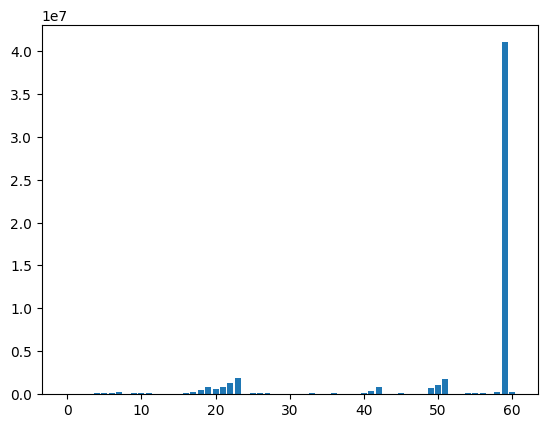

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features_2(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features_1(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [108]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.000


In [113]:
from sklearn.metrics import r2_score

score = r2_score(y_test, yhat)
print(score)

1.0
